In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from math import floor
from matplotlib.animation import FuncAnimation as create_anim

In [4]:
# function calculating number determining evolution in next step

def code_board(board):
    
    shifts = [[1, 1], [1, 0], [1, -1], [0, 1], [0, 0], [0, -1], [-1, 1], [-1, 0], [-1, -1]]
    new_board = np.zeros(shape = board.shape)

    for i, s in enumerate(shifts):
        new_board = new_board + 2**i * np.roll(a = board, shift = s, axis = [0, 1])

    return new_board

# function updating board with defined rule

def update(coded_board, chromosome):

    new_board = np.empty(coded_board.shape)

    for row in range(coded_board.shape[0]):
        for col in range(coded_board.shape[1]):
            idx = floor(coded_board[row, col])
            new_board[row, col] = chromosome[idx]

    return new_board

# define evolution through some time with given chromosome

def act_on_board(board, chromosome, time):

    new_board = board.copy()

    for t in range(time):
        new_board = code_board(new_board)
        new_board = update(new_board, chromosome)

    return new_board

# chromosome generating function, yeah, I'm lazy

def chromosome():
    return np.random.choice(np.array([0, 1]), 512)

# function mutating chromosome

def mutate(chromosome, mutation_number, probability_of_mutation):

    p = np.random.uniform()
    
    if p > probability_of_mutation:
        return chromosome
    
    else:
        new_chromosome = chromosome.copy()
        indexes = np.random.choice(range(512), mutation_number)

        for i in indexes:
            if new_chromosome[i] == 1:
                new_chromosome[i] = 0
            elif new_chromosome[i] == 0:
                new_chromosome[i] = 1

        return new_chromosome

# function creating new chromosome from the old ones

def have_sex(chromo1, chromo2, ratio = 0.5):

    child = []
    for i in range(512):
        p = np.random.uniform()
        if p < ratio:
            child.append(chromo1[i])
        elif p >= ratio:
            child.append(chromo2[i])
    
    return np.array(child)

def grade(board):

    score = 0

    for row in range(board.shape[0]):
        for col in range(board.shape[1]):

            # periodic boundaries by hand

            next_row = row + 1
            next_col = col + 1
            prev_col = col - 1

            if row == board.shape[0] - 1:
                next_row = 0
            if col == board.shape[1] - 1:
                next_col = 0
            if col == 0:
                prev_col = board.shape[1] - 1
            
            # and scoring
            
            if board[row, col] == board[next_row, col] or board[row, col] == board[row, next_col]:
                score -= 3
            else:
                score -= 10
                if board[row, col] == board[next_row, next_col]:
                    score += 13
                if board[row, col] == board[next_row, prev_col]:
                    score += 13

    return score


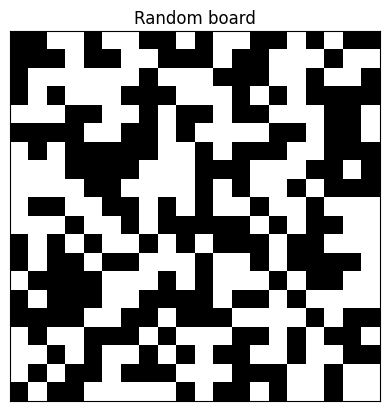

Generation number 0.
The best score in generation: -266
Generation number 1.
The best score in generation: -266
Generation number 2.
The best score in generation: 8
Generation number 3.
The best score in generation: 8
Generation number 4.
The best score in generation: 8
Generation number 5.
The best score in generation: 8
Generation number 6.
The best score in generation: 8
Generation number 7.
The best score in generation: 8
Generation number 8.
The best score in generation: 8
Generation number 9.
The best score in generation: 8
Generation number 10.
The best score in generation: 8
Generation number 11.
The best score in generation: 8
Generation number 12.
The best score in generation: 8
Generation number 13.
The best score in generation: 186
Generation number 14.
The best score in generation: 414
Generation number 15.
The best score in generation: 414
Generation number 16.
The best score in generation: 414
Generation number 17.
The best score in generation: 414
Generation number 18.


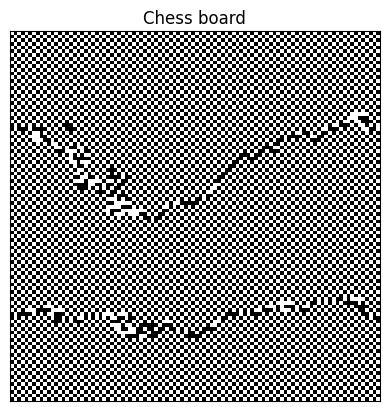

In [5]:
# initiate board

size = 50
board = np.reshape(np.random.choice(a = np.array([0, 1]), size = size**2), [size, size])
plt.imshow(board, cmap = "gray")
plt.title("Random board")
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()

# initial chromosomes

chromo_num = 40

chromosome_list = []
for i in range(chromo_num):
    chromosome_list.append(chromosome())

# let the games begin

generation_number = 50
fraction_of_mutants = 0.8
fraction_of_survivals = 0.5
number_of_mutations = 5
life_duration = 100

for generation in range(generation_number):
    print("Generation number {}.".format(generation))

    # let's test who is the best

    losses = []

    for c in chromosome_list:

        new_board = board.copy()
        new_board = act_on_board(new_board, c, life_duration)
        losses.append(grade(new_board))
    print("The best score in generation: {}".format(max(losses)))

    # kill losers

    score_table = sorted([[losses[num], num] for num in range(len(chromosome_list))], reverse = True)
    survivals_id = [score_table[i][1] for i in range(floor(chromo_num*fraction_of_survivals))]
    survivals = [chromosome_list[id] for id in survivals_id]

    # let survivals have children

    next_generation = []
    for i in range(len(chromosome_list) - 1): 

        mother_name = np.random.choice(len(survivals))
        mother = survivals[mother_name]
        father_name = np.random.choice(len(survivals))
        father = survivals[father_name]

        child = have_sex(father, mother)

        # let child mutate a bit

        child = mutate(child, number_of_mutations, fraction_of_mutants)
        next_generation.append(child)
    
    # the best one is immortal

    next_generation.append(survivals[0])
    chromosome_list = next_generation

winner = chromosome_list[-1]

# test the winner

big_size = 50
final_board = np.reshape(np.random.choice(a = np.array([0, 1]), size = big_size**2), [big_size, big_size])
final_board = act_on_board(final_board, winner, 1000)
plt.imshow(final_board, cmap = "gray")
plt.title("Chess board")
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()

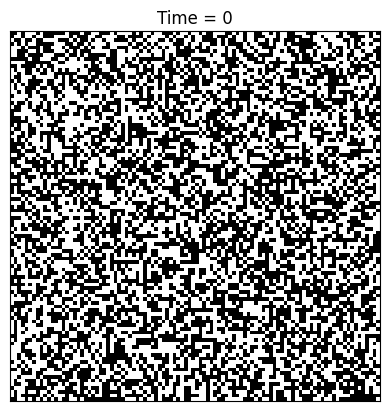

In [26]:
# initiate board

size = 100
board = np.reshape(np.random.choice(a = np.array([0, 1]), size = size**2), [size, size])

# animation

frames = []

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(board, cmap = "gray")
ax.set_title("Time = {}".format(0))
ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)

def init():
    im.set_data(board)
    return [im]

def animate(i):
    im = ax.imshow(frames[i], cmap = "gray")
    ax.set_title("Time = {}".format(i*print_time))
    return [im]

# time loop

time = 400
print_time = 4

new_board = board.copy()

for t in range(time):
    new_board = code_board(new_board)
    new_board = update(new_board, winner)

    # save frames

    if t % print_time == 0:
        frames.append(new_board)

# create and save animation to file

animation = create_anim(fig, animate, frames = floor(time / print_time))
animation.save("Let's play chess.gif")